In [3]:
from collections import OrderedDict as od
#from modelFunctions import *
from parameters_uM_ms import *
#from misc import *

class neuron:
    def __init__(self, model):
        self.model = model
        # Indexing of the compartment variables
        i = 0
        self.idx = od()
        self.X0 = []
        if 'Ca' in model:
            if model['Ca'] == []: self.X0 += initV['Ca']
            else: self.X0 += model['Ca']
            self.idx.update({'Ca':od([('Ca', i)])})
            i += len(initV['Ca'])

        if 'HH' in model:
            if model['HH'] == []: self.X0 += initV['HH']
            else: self.X0 += model['HH']
            self.idx.update({'HH':od(zip(['V', 'm', 'h', 'n'], range(i,i+4)))})
            i += len(initV['HH'])
            self.V = -64.0

        if 'PMCA' in model:
            if model['PMCA'] == []: self.X0 += initV['PMCA']
            else: self.X0 += model['PMCA']
            self.idx.update({'PMCA':od(zip(['PMCA0', 'PMCA1', 'PMCA2'], range(i,i+3)))})
            i += len(initV['PMCA'])

        if 'VDCC' in model:
            if model['VDCC'] == []: self.X0 += initV['VDCC']
            else: self.X0 += model['VDCC']
            self.idx.update({'VDCC':
                             od(zip(['VDCC_C0', 'VDCC_C1', 'VDCC_C2',
                                    'VDCC_C3', 'VDCC_C4', 'VDCC_O'],
                                    range(i,i+6)))})
            i += len(initV['VDCC'])
            self.V = -64.0

        if 'cb' in model:
            if model['cb'] == []: self.X0 += initV['cb']
            else: self.X0 += model['cb']
            self.idx.update({'cb':
                od([('cbH0M0', i)  , ('cbH0M1', i+1), ('cbH0M2', i+2),
                    ('cbH1M0', i+3), ('cbH1M1', i+4), ('cbH1M2', i+5),
                    ('cbH2M0', i+6), ('cbH2M1', i+7), ('cbH2M2', i+8)])})
            i += len(initV['cb'])

        if 'AZ' in model:
            if model['AZ'] == []: self.X0 += initV['AZ']
            else: self.X0 += model['AZ']
            self.idx.update(
                    od([('AZ00', i+0 ), ('AZ10', i+1 ), ('AZ20', i+2 ),
                        ('AZ30', i+3 ), ('AZ40', i+4 ), ('AZ50', i+5 ),
                        ('AZ01', i+6 ), ('AZ11', i+7 ), ('AZ21', i+8 ),
                        ('AZ31', i+9 ), ('AZ41', i+10), ('AZ51', i+11),
                        ('AZ02', i+12), ('AZ12', i+13), ('AZ22', i+14),
                        ('AZ32', i+15), ('AZ42', i+16), ('AZ52', i+17)]))
            i += len(initV['AZ'])
            
        if 'CaM' in model:
            if model['CaM'] == []: self.X0 += initV['CaM']
            else: self.X0 += model['CaM']
            self.idx.update({'CaM':
                    od([('CaMC0N0', i+0 ), ('CaMC1N0', i+1 ), ('CaMC2N0', i+2 ),
                        ('CaMC0N1', i+3 ), ('CaMC1N1', i+4 ), ('CaMC2N1', i+5 ),
                        ('CaMC0N2', i+6 ), ('CaMC1N2', i+7 ), ('CaMC2N2', i+8 )])})
            i += len(initV['CaM'])
            
        if 'CaMKII' in model:
            if model['CaMKII'] == []: self.X0 += initV['CaMKII']
            else: self.X0 += model['CaMKII']
            self.idx.update({'CaMKII':
                    od([('KCaMC0N0', i+0), ('KCaMC1N0', i+1), ('KCaMC2N0', i+2),
                        ('KCaMC0N1', i+3), ('KCaMC1N1', i+4), ('KCaMC2N1', i+5),
                        ('KCaMC0N2', i+6), ('KCaMC1N2', i+7), ('KCaMC2N2', i+8),
                        ('K', i+9)])})
            i += len(initV['CaMKII'])

        self.nVar = i
        #rint 'X0:', self.X0, '\n', idx, '\n', self.nVar, '\n\n'


    def dXdt(self, X, t):
    #def dXdt(self, t, X):
        self.dX = []
        i=0
        if 'Ca' in self.model:
            j = len(initV['Ca'])
            Ca = X[i]
            i += j

        if 'HH' in self.model:
            j = len(initV['HH'])
            self.V, m, h, n = X[i:i+j]  # V is a property of object as it is to be provided externally
            i += j

        if 'PMCA' in self.model:
            j = len(initV['PMCA'])
            PMCA0, PMCA1, PMCA2 = X[i:i+j]
            i += j

        if 'cb' in self.model:
            j = len(initV['cb'])
            cbH0M0, cbH0M1, cbH0M2,\
            cbH1M0, cbH1M1, cbH1M2,\
            cbH2M0, cbH2M1, cbH2M2 = X[i:i+j]
            i += j

        if 'VDCC' in self.model:
            j = len(initV['VDCC'])
            VDCC_C0, VDCC_C1, VDCC_C2,\
            VDCC_C3, VDCC_C4, VDCC_O = X[i:i+j]
            i += j

        if 'AZ' in self.model:
            j = len(initV['AZ'])
            AZ00, AZ10, AZ20, AZ30, AZ40, AZ50,\
            AZ01, AZ11, AZ21, AZ31, AZ41, AZ51,\
            AZ02, AZ12, AZ22, AZ32, AZ42, AZ52 = X[i:i+j]
            i += j

        if 'CaM' in self.model:
            j = len(initV['CaM'])
            CaMC0N0, CaMC0N1, CaMC0N2, CaMC1N0, CaMC1N1,\
            CaMC1N2, CaMC2N0, CaMC2N1, CaMC2N2 = X[i:i+j]
            i += j
            
        if 'CaMKII' in self.model:
            j = len(initV['CaMKII'])
            KCaMC0N0, KCaMC0N1, KCaMC0N2, KCaMC1N0, KCaMC1N1,\
            KCaMC1N2, KCaMC2N0, KCaMC2N1, KCaMC2N2, K = X[i:i+j]
            i += j

        #################### Equations #####################
        if 'Ca' in self.model:
            self.dX += [0]

        ### HH model
        if 'HH' in self.model:
            dV = (I_inj(t) - I_Na(self.V, m, h) - I_K(self.V, n) - I_L(self.V)) / C_m
            dm = (alpha_m(self.V)*(1.0-m) - beta_m(self.V)*m)
            dh = (alpha_h(self.V)*(1.0-h) - beta_h(self.V)*h)
            dn = (alpha_n(self.V)*(1.0-n) - beta_n(self.V)*n)

            self.dX += [dV, dm, dh, dn]

        ### PMCA
        if 'PMCA' in self.model:
            dCa    = + (kPMCA0leak - kPMCA01*Ca)*PMCA0 + kPMCA10*PMCA1
            dPMCA0 = + kPMCA20*PMCA2 + kPMCA10*PMCA1 - kPMCA01*Ca*PMCA0
            dPMCA1 = - (kPMCA12 + kPMCA10)*PMCA1 + kPMCA01*Ca*PMCA0
            dPMCA2 = - kPMCA20*PMCA2 + kPMCA12*PMCA1

            self.dX += [dPMCA0, dPMCA1, dPMCA2]
            self.dX[0] += dCa

        ### VDCC
        if 'VDCC' in self.model:
            dCa        = VDCC_O*CaFlux(self.V)
            dVDCC_C0 = + pq_b1(self.V)*VDCC_C1 - pq_a1(self.V)*VDCC_C0
            dVDCC_C1 = + pq_a1(self.V)*VDCC_C0 + pq_b2(self.V)*VDCC_C2 \
                         -(pq_b1(self.V) + pq_a2(self.V))*VDCC_C1
            dVDCC_C2 = + pq_a2(self.V)*VDCC_C1 + pq_b3(self.V)*VDCC_C3 \
                         -(pq_b2(self.V) + pq_a3(self.V))*VDCC_C2
            dVDCC_C3 = + pq_a3(self.V)*VDCC_C2 + pq_b4(self.V)*VDCC_C4 \
                         -(pq_b3(self.V) + pq_a4(self.V))*VDCC_C3
            dVDCC_C4 = + pq_a4(self.V)*VDCC_C3 + pq_b*VDCC_O \
                         -(pq_b4(self.V) + pq_a)*VDCC_C4
            dVDCC_O  = + pq_a*VDCC_C4 - pq_b*VDCC_O

            self.dX += [dVDCC_C0, dVDCC_C1, dVDCC_C2, dVDCC_C3, dVDCC_C4, dVDCC_O]
            self.dX[0] += dCa

        ### Calcium Buffers
        if 'cb' in self.model:
            dCa =   + cbMoff*(cbH2M1 + cbH1M1 + cbH0M1 + 2*(cbH2M2 + cbH1M2 + cbH0M2)) \
                    + cbHoff*(cbH2M1 + cbH1M1 + cbH0M1 + 2*(cbH2M2 + cbH2M1 + cbH2M0)) \
                 - (+ cbMon*(cbH2M1 + cbH1M1 + cbH0M1  + 2*(cbH2M0 + cbH1M0 + cbH0M0)) \
                    + cbHon*(cbH2M1 + cbH1M1 + cbH0M1  + 2*(cbH0M2 + cbH0M1 + cbH0M0)) )*Ca

            dcbH0M0 = - 2*(cbMon+cbHon)*cbH0M0*Ca + cbMoff*cbH0M1 + cbHoff*cbH1M0

            dcbH0M1 = + (2*cbMon*cbH0M0 - (cbMon + 2*cbHon)*cbH0M1)*Ca \
                      + cbMoff*(2*cbH0M2 - cbH0M1) + cbHoff*cbH1M1

            dcbH0M2 = + cbMon*cbH0M1*Ca - 2*(cbMoff + cbHon*Ca)*cbH0M2 + cbHoff*cbH1M2

            dcbH1M0 = + (2*cbHon*cbH0M0 - (cbHon + 2*cbMon)*cbH1M0)*Ca\
                      + cbMoff*cbH1M1   + cbHoff*(2*cbH2M0 - cbH1M0)

            dcbH1M1 = - ((cbMon + cbHon)*Ca + (cbHoff + cbMoff))*cbH1M1\
                      + 2*((cbMoff*cbH1M2 + cbHoff*cbH2M1) + (cbMon*cbH1M0 + cbHon*cbH0M1)*Ca)

            dcbH1M2 = + (cbMon*cbH1M1 + 2*cbHon*cbH0M2 - cbHon*cbH1M2)*Ca\
                      - (2*cbMoff + cbHoff)*cbH1M2 + 2*cbHoff*cbH2M2

            dcbH2M0 = + cbMoff*cbH2M1 + cbHon*cbH1M0*Ca - 2*(cbHoff + cbMon*Ca)*cbH2M0

            dcbH2M1 = + (cbHon*cbH1M1 - cbMon*cbH2M1 + 2*cbMon*cbH2M0)*Ca\
                      + 2*(cbMoff*cbH2M2 - cbHoff*cbH2M1) - cbMoff*cbH2M1

            dcbH2M2 = + (cbMon*cbH2M1 + cbHon*cbH1M2)*Ca - 2*(cbHoff + cbMoff)*cbH2M2

            #print(sum([dcbH0M0, dcbH0M1, dcbH0M2, dcbH1M0, dcbH1M1, dcbH1M2, dcbH2M0, dcbH2M1, dcbH2M2]))
            self.dX += [dcbH0M0, dcbH0M1, dcbH0M2, dcbH1M0, dcbH1M1, dcbH1M2, dcbH2M0, dcbH2M1, dcbH2M2]
            self.dX[0] += dCa

        ### Calcium Sensors
        if 'AZ' in self.model:
            
            dCa  = + (ab - af*Ca)*(AZ01 + AZ11 + AZ21 + AZ31 + AZ41 + AZ51)\
                   + 2*ab*b*(AZ02 + AZ12 + AZ22 + AZ32 + AZ42 + AZ52)\
                   - 2*af*(AZ00 + AZ10 + AZ20 + AZ30 + AZ40 + AZ50)*Ca\
                   + sb*((AZ10 + AZ11 + AZ12) + 2*b*(AZ20 + AZ21 + AZ22)\
                     + 3*b**2*(AZ30 + AZ31 + AZ32) + 4*b**3*(AZ40 + AZ41 + AZ42)\
                     + 5*b**4*(AZ50 + AZ51 + AZ52))\
                   - sf*((AZ40 + AZ42 + AZ41) + 2*(AZ30 + AZ31 + AZ32)\
                     + 3*(AZ20 + AZ21 + AZ22) + 4*(AZ10 + AZ12 + AZ11)\
                     + 5*(AZ00 + AZ01 + AZ02))*Ca
            

            dAZ00 =  + sb*AZ10 + ab*AZ01 - (5*sf + 2*af)*AZ00*Ca
            dAZ10 =  + 2*sb*b*AZ20 + 5*sf*AZ00*Ca + ab*AZ11\
                      - ((2*af + 4*sf)*Ca + sb)*AZ10
            dAZ20 =  + 3*sb*b**2*AZ30 + 4*sf*AZ10*Ca + ab*AZ21\
                      - ((2*af + 3*sf)*Ca + 2*sb*b)*AZ20
            dAZ30 =  + 4*sb*b**3*AZ40 + 3*sf*AZ20*Ca + ab*AZ31\
                      - (2*(af + sf)*Ca + 3*sb*b**2)*AZ30
            dAZ40 =  + 5*sb*b**4*AZ50 + 2*sf*AZ30*Ca + ab*AZ41\
                      - ((2*af + sf)*Ca + 4*sb*b**3)*AZ40
            dAZ50 =  + ab*AZ51 + (sf*AZ40 - 2*af*AZ50)*Ca - 5*sb*b**4*AZ50

            dAZ01 =  + 2*ab*b*AZ02 + sb*AZ11 + 2*af*AZ00*Ca\
                      - ((af + 5*sf)*Ca + ab)*AZ01
            dAZ11 =  + 2*(ab*AZ12 + sb*AZ21)*b + (5*sf*AZ01 + 2*af*AZ10)*Ca\
                      - ((af + 4*sf)*Ca + ab + sb)*AZ11
            dAZ21 =  + 2*ab*b*AZ22 + 3*sb*b**2*AZ31 + (4*sf*AZ11 + 2*af*AZ20)*Ca\
                      - ((af + 3*sf)*Ca + ab*AZ21 + 2*sb*b)*AZ21
            dAZ31 =  + 2*ab*b*AZ32 + 4*sb*b**3*AZ41 + (2*af*AZ30 + 3*sf*AZ21)*Ca\
                      - ((af + + 2*sf)*Ca + ab + 2*sf*Ca + 3*sb*b**2)*AZ31
            dAZ41 =  + 2*ab*b*AZ42 + 5*sb*b**4*AZ51 + 2*(sf*AZ31 + af*AZ40)*Ca\
                      - ((af + sf)*Ca + ab + 4*sb*b**3)*AZ41
            dAZ51 =  + 2*ab*b*AZ52 + (2*af*AZ50 + sf*AZ41)*Ca\
                      - (af*Ca + ab + 5*sb*b**4)*AZ51

            dAZ02 =  + af*AZ01*Ca + sb*AZ12 - (2*ab*b + 5*sf*Ca)*AZ02
            dAZ12 =  + (af*AZ11 + 5*sf*AZ02)*Ca + 2*sb*b*AZ22\
                      - (2*ab*b + 4*sf*Ca + sb)*AZ12
            dAZ22 =  + (af*AZ21 + 4*sf*AZ12)*Ca + 3*sb*b**2*AZ32\
                      - (2*(ab + sb)*b + 3*sf*Ca)*AZ22
            dAZ32 =  + 4*sb*b**3*AZ42 + (af*AZ31 + 3*sf*AZ22)*Ca\
                      - (2*(ab*b + sf*Ca) + 3*sb*b**2)*AZ32
            dAZ42 =  + (af*AZ41 + 2*sf*AZ32)*Ca + 5*sb*b**4*AZ52\
                      - (2*ab*b + sf*Ca + 4*sb*b**3)*AZ42
            dAZ52 =  + af*AZ51*Ca + sf*AZ42*Ca - 2*ab*b*AZ52 - 5*sb*b**4*AZ52


            self.dX += [dAZ00, dAZ10, dAZ20, dAZ30, dAZ40, dAZ50, dAZ01, dAZ11, dAZ21,\
                        dAZ31, dAZ41, dAZ51, dAZ02, dAZ12, dAZ22, dAZ32, dAZ42, dAZ52]
            self.dX[0] += dCa
            
            
        ### Ca/Calmodulin
        if 'CaM' in self.model:
            
            dCa = - k_N2_on*CaMC2N1*Ca + k_N2_off*CaMC2N2 - k_C2_on*CaMC1N2*Ca + k_C2_off*CaMC2N2\
                  - k_N2_on*CaMC1N1*Ca + k_N2_off*CaMC1N2 - k_C2_on*CaMC1N1*Ca + k_C2_off*CaMC2N1\
                  - k_N1_on*CaMC2N0*Ca + k_N1_off*CaMC2N1 - k_C1_on*CaMC0N2*Ca + k_C1_off*CaMC1N2\
                  - k_N2_on*CaMC0N1*Ca + k_N2_off*CaMC0N2 - k_C1_on*CaMC0N1*Ca + k_C1_off*CaMC1N1\
                  - k_N1_on*CaMC1N0*Ca + k_N1_off*CaMC1N1 - k_C2_on*CaMC1N0*Ca + k_C2_off*CaMC2N0\
                  - k_N1_on*CaMC0N0*Ca + k_N1_off*CaMC0N1 - k_C1_on*CaMC0N0*Ca + k_C1_off*CaMC1N0
            
            dCaMC0N0 = - k_N1_on*CaMC0N0*Ca + k_N1_off*CaMC0N1 - k_C1_on*CaMC0N0*Ca + k_C1_off*CaMC1N0
            dCaMC0N1 = - k_N2_on*CaMC0N1*Ca + k_N2_off*CaMC0N2 - k_C1_on*CaMC0N1*Ca\
                       + k_C1_off*CaMC1N1 + k_N1_on*CaMC0N0*Ca - k_N1_off*CaMC0N1
            dCaMC0N2 = - k_C1_on*CaMC0N2*Ca + k_C1_off*CaMC1N2 + k_N2_on*CaMC0N1*Ca - k_N2_off*CaMC0N2
            dCaMC1N0 = - k_N1_on*CaMC1N0*Ca + k_N1_off*CaMC1N1 - k_C2_on*CaMC1N0*Ca\
                       + k_C2_off*CaMC2N0 + k_C1_on*CaMC0N0*Ca - k_C1_off*CaMC1N0
            dCaMC1N1 = - k_N2_on*CaMC1N1*Ca + k_N2_off*CaMC1N2 - k_C2_on*CaMC1N1*Ca + k_C2_off*CaMC2N1\
                       + k_C1_on*CaMC0N1*Ca - k_C1_off*CaMC1N1 + k_N1_on*CaMC1N0*Ca - k_N1_off*CaMC1N1
            dCaMC1N2 = - k_C2_on*CaMC1N2*Ca + k_C2_off*CaMC2N2 + k_N2_on*CaMC1N1*Ca\
                       - k_N2_off*CaMC1N2 + k_C1_on*CaMC0N2*Ca - k_C1_off*CaMC1N2
            dCaMC2N0 = - k_N1_on*CaMC2N0*Ca + k_N1_off*CaMC2N1 + k_C2_on*CaMC1N0*Ca - k_C2_off*CaMC2N0
            dCaMC2N1 = - k_N2_on*CaMC2N1*Ca + k_N2_off*CaMC2N2 + k_C2_on*CaMC1N1*Ca\
                       - k_C2_off*CaMC2N1 + k_N1_on*CaMC2N0*Ca - k_N1_off*CaMC2N1
            dCaMC2N2 = + k_N2_on*CaMC2N1*Ca - k_N2_off*CaMC2N2 + k_C2_on*CaMC1N2*Ca - k_C2_off*CaMC2N2

            self.dX += [dCaMC0N0, dCaMC0N1, dCaMC0N2, dCaMC1N0, dCaMC1N1, dCaMC1N2, dCaMC2N0, dCaMC2N1, dCaMC2N2]
            self.dX[0] += dCa
            
            
        ### Ca/Calmodulin/CaMKII
        if 'CaMKII' in self.model:

            dCa = - k_N2_on*KCaMC2N1*Ca + k_N2_off*KCaMC2N2 - k_C2_on*KCaMC1N2*Ca + k_C2_off*KCaMC2N2\
                  - k_N2_on*KCaMC1N1*Ca + k_N2_off*KCaMC1N2 - k_C2_on*KCaMC1N1*Ca + k_C2_off*KCaMC2N1\
                  - k_N1_on*KCaMC2N0*Ca + k_N1_off*KCaMC2N1 - k_C1_on*KCaMC0N2*Ca + k_C1_off*KCaMC1N2\
                  - k_N2_on*KCaMC0N1*Ca + k_N2_off*KCaMC0N2 - k_C1_on*KCaMC0N1*Ca + k_C1_off*KCaMC1N1\
                  - k_N1_on*KCaMC1N0*Ca + k_N1_off*KCaMC1N1 - k_C2_on*KCaMC1N0*Ca + k_C2_off*KCaMC2N0\
                  - k_N1_on*KCaMC0N0*Ca + k_N1_off*KCaMC0N1 - k_C1_on*KCaMC0N0*Ca + k_C1_off*KCaMC1N0
            
            dK = - k_CaMC2N1_on*CaMC2N1*K + k_CaMC2N1_off*KCaMC2N1 - k_CaMC1N2_on*CaMC1N2*K + k_CaMC1N2_off*KCaMC1N2\
                 - k_CaMC1N1_on*CaMC1N1*K + k_CaMC1N1_off*KCaMC1N1 - k_CaMC1N1_on*CaMC1N1*K + k_CaMC1N1_off*KCaMC1N1\
                 - k_CaMC2N0_on*CaMC2N0*K + k_CaMC2N0_off*KCaMC2N0 - k_CaMC0N2_on*CaMC0N2*K + k_CaMC0N2_off*KCaMC0N2\
                 - k_CaMC0N1_on*CaMC0N1*K + k_CaMC0N1_off*KCaMC0N1 - k_CaMC0N1_on*CaMC0N1*K + k_CaMC0N1_off*KCaMC0N1\
                 - k_CaMC1N0_on*CaMC1N0*K + k_CaMC1N0_off*KCaMC1N0 - k_CaMC1N0_on*CaMC1N0*K + k_CaMC1N0_off*KCaMC1N0\
                 - k_CaMC0N0_on*CaMC0N0*K + k_CaMC0N0_off*KCaMC0N0 - k_CaMC0N0_on*CaMC0N0*K + k_CaMC0N0_off*KCaMC0N0
            
            dCaMC0N0 = - k_CaMC0N0_on*CaMC0N0*K + k_CaMC0N0_off*KCaMC0N0 - k_CaMC0N0_on*CaMC0N0*K + k_CaMC0N0_off*KCaMC0N0
            dCaMC0N1 = - k_CaMC0N1_on*CaMC0N1*K + k_CaMC0N1_off*KCaMC0N1 - k_CaMC0N1_on*CaMC0N1*K + k_CaMC0N1_off*KCaMC0N1
            dCaMC0N2 = - k_CaMC0N2_on*CaMC0N2*K + k_CaMC0N2_off*KCaMC0N2
            dCaMC1N0 = - k_CaMC1N0_on*CaMC1N0*K + k_CaMC1N0_off*KCaMC1N0 - k_CaMC1N0_on*CaMC1N0*K + k_CaMC1N0_off*KCaMC1N0
            dCaMC1N1 = - k_CaMC1N1_on*CaMC1N1*K + k_CaMC1N1_off*KCaMC1N1 - k_CaMC1N1_on*CaMC1N1*K + k_CaMC1N1_off*KCaMC1N1
            dCaMC1N2 = - k_CaMC1N2_on*CaMC1N2*K + k_CaMC1N2_off*KCaMC1N2
            dCaMC2N0 = - k_CaMC2N0_on*CaMC2N0*K + k_CaMC2N0_off*KCaMC2N0
            dCaMC2N1 = - k_CaMC2N1_on*CaMC2N1*K + k_CaMC2N1_off*KCaMC2N1
            
            dKCaMC0N0 = + k_CaMC0N0_on*CaMC0N0*K - k_CaMC0N0_off*KCaMC0N0 + k_CaMC0N0_on*CaMC0N0*K - k_CaMC0N0_off*KCaMC0N0\
                        - k_N1_on*KCaMC0N0*Ca + k_N1_off*KCaMC0N1 - k_C1_on*KCaMC0N0*Ca + k_C1_off*KCaMC1N0
            dKCaMC0N1 = + k_CaMC0N1_on*CaMC0N1*K - k_CaMC0N1_off*KCaMC0N1 + k_CaMC0N1_on*CaMC0N1*K - k_CaMC0N1_off*KCaMC0N1 - k_N2_on*KCaMC0N1*Ca\
                        + k_N2_off*KCaMC0N2 - k_C1_on*KCaMC0N1*Ca + k_C1_off*KCaMC1N1 + k_N1_on*KCaMC0N0*Ca - k_N1_off*KCaMC0N1
            dKCaMC0N2 = + k_CaMC0N2_on*CaMC0N2*K - k_CaMC0N2_off*KCaMC0N2 - k_C1_on*KCaMC0N2*Ca\
                        + k_C1_off*KCaMC1N2 + k_N2_on*KCaMC0N1*Ca - k_N2_off*KCaMC0N2
            dKCaMC1N0 = + k_CaMC1N0_on*CaMC1N0*K - k_CaMC1N0_off*KCaMC1N0 + k_CaMC1N0_on*CaMC1N0*K - k_CaMC1N0_off*KCaMC1N0 - k_N1_on*KCaMC1N0*Ca\
                        + k_N1_off*KCaMC1N1 - k_C2_on*KCaMC1N0*Ca + k_C2_off*KCaMC2N0 + k_C1_on*KCaMC0N0*Ca - k_C1_off*KCaMC1N0
            dKCaMC1N1 = + k_CaMC1N1_on*CaMC1N1*K - k_CaMC1N1_off*KCaMC1N1 + k_CaMC1N1_on*CaMC1N1*K - k_CaMC1N1_off*KCaMC1N1 - k_N2_on*KCaMC1N1*Ca\
                        + k_N2_off*KCaMC1N2 - k_C2_on*KCaMC1N1*Ca + k_C2_off*KCaMC2N1 + k_C1_on*KCaMC0N1*Ca - k_C1_off*KCaMC1N1 + k_N1_on*KCaMC1N0*Ca - k_N1_off*KCaMC1N1
            dKCaMC1N2 = + k_CaMC1N2_on*CaMC1N2*K - k_CaMC1N2_off*KCaMC1N2 - k_C2_on*KCaMC1N2*Ca + k_C2_off*KCaMC2N2\
                        + k_N2_on*KCaMC1N1*Ca - k_N2_off*KCaMC1N2 + k_C1_on*KCaMC0N2*Ca - k_C1_off*KCaMC1N2
            dKCaMC2N0 = + k_CaMC2N0_on*CaMC2N0*K - k_CaMC2N0_off*KCaMC2N0 - k_N1_on*KCaMC2N0*Ca\
                        + k_N1_off*KCaMC2N1 + k_C2_on*KCaMC1N0*Ca - k_C2_off*KCaMC2N0
            dKCaMC2N1 = + k_CaMC2N1_on*CaMC2N1*K - k_CaMC2N1_off*KCaMC2N1 - k_N2_on*KCaMC2N1*Ca\
                        + k_N2_off*KCaMC2N2 + k_C2_on*KCaMC1N1*Ca - k_C2_off*KCaMC2N1 + k_N1_on*KCaMC2N0*Ca - k_N1_off*KCaMC2N1
            dKCaMC2N2 = + k_N2_on*KCaMC2N1*Ca - k_N2_off*KCaMC2N2 + k_C2_on*KCaMC1N2*Ca - k_C2_off*KCaMC2N2

            
            self.dX += [dCaMC0N0, dCaMC0N1, dCaMC0N2, dCaMC1N0, dCaMC1N1, dCaMC1N2, dCaMC2N0, dCaMC2N1, dKCaMC0N0, dKCaMC0N1, dKCaMC0N2, dKCaMC1N0, dKCaMC1N1, dKCaMC1N2, dKCaMC2N0, dKCaMC2N1, dKCaMC2N2, dK]
            self.dX[0] += dCa
        
        return self.dX

In [4]:
model = {'HH':[], 'Ca':[], 'VDCC':[], 'PMCA':[], 'cb':[]}#, 'CaMKII':[], 'CaM':[]}
n = neuron(model=model)
#printd(n.X0, '\n', n.idx)

NameError: name 'initV' is not defined

In [3]:
ti, tf, tstep = 0, 10e-3, 1e-4
T = np.arange(ti, tf, tstep)

#sol = solve_ivp(n.dXdt, (ti,tf), n.X0, t_eval=T, vectorized=True)#, rtol=1e-13, atol=1e-15)
#sol = sol.y

sol = odeint(n.dXdt, n.X0, T, rtol=1e-5, atol=1e-8).T

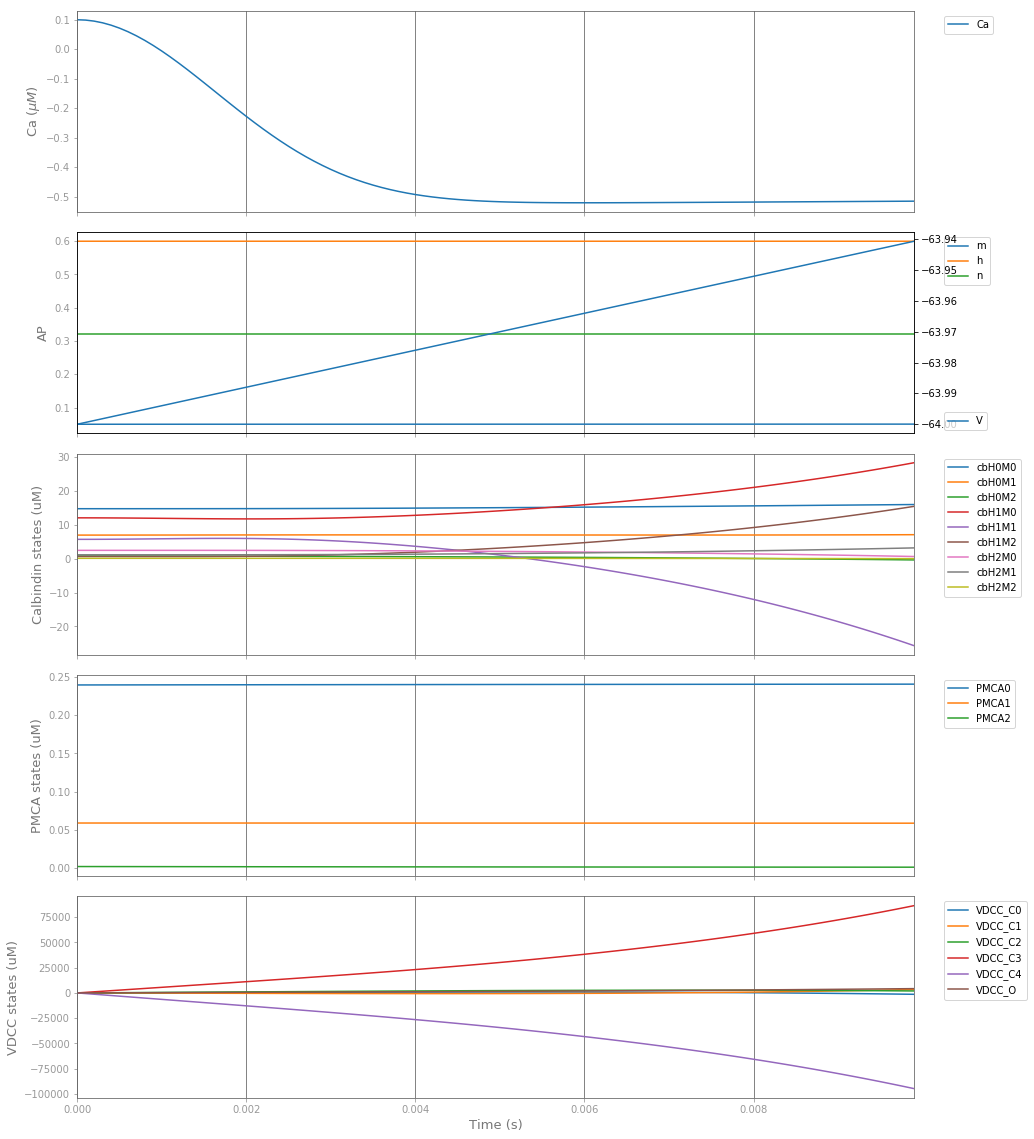

In [4]:
nFig = len(n.idx)
figure, ax = plt.subplots(nFig, figsize=(15, 4*nFig), sharex=True)
figure.subplots_adjust(hspace=0.1)
labelfontsize = 13

j = 0
if 'Ca' in n.model:
    ax[j].plot(T, sol[n.idx['Ca']['Ca']], label='Ca')
    ax[j].set_ylabel(r'Ca ($\mu M$)', fontsize=labelfontsize)
    j += 1
    
if 'HH' in n.model: 
    for mol,i in n.idx['HH'].items():
        if mol == 'V':
            axt = ax[j].twinx()
            axt.plot(T, sol[n.idx['HH'][mol]], label=mol)
            axt.legend(loc='upper left', facecolor='white', framealpha=0.8, bbox_to_anchor=(1.03,0.13))
        else:
            ax[j].plot(T, sol[n.idx['HH'][mol]], label=mol)
    ax[j].set_ylabel('AP', fontsize=labelfontsize)
    j += 1

if 'cb' in n.model: 
    for mol,i in n.idx['cb'].items():
        ax[j].plot(T,sol[ n.idx['cb'][mol]], label=mol)
    ax[j].set_ylabel('Calbindin states (uM)', fontsize=labelfontsize)
    #ax[j].set_ylim((0, 50e-6))
    j += 1

if 'PMCA' in n.model:
    for mol,i in n.idx['PMCA'].items():
        ax[j].plot(T, sol[n.idx['PMCA'][mol]], label=mol)
    ax[j].set_ylabel('PMCA states (uM)', fontsize=labelfontsize)
    j += 1

if 'VDCC' in n.model: 
    for mol,i in n.idx['VDCC'].items():
        ax[j].plot(T, sol[n.idx['VDCC'][mol]], label=mol)
    ax[j].set_ylabel('VDCC states (uM)', fontsize=labelfontsize)
    #ax[j].set_ylim((0,80))
    j += 1

if 'AZ' in n.model:
    for mol,i in n.idx['AZ'].items():
    #for mol in [azMolName[i] for i in [0,5,11,12,13,14,15,16,17]]:
        i = azMolName.index(mol)
        ax[j].plot(T, sol[n.idx['AZ'][mol]], label=mol)
    ax[j].set_ylabel('AZ states (num)', fontsize=labelfontsize)
    j += 1
    
if 'RyR' in n.model:
    for mol,i in n.idx['RyR'].items():
        ax[j].plot(T, sol[n.idx['RyR'][mol]], label=mol)
    ax[j].set_ylabel('RyR states (uM)', fontsize=labelfontsize)
    j += 1

ax[-1].set_xlabel('Time (s)', fontsize=labelfontsize)

facecol = '#ffffff11'
labelcol = '#777777'
tickcol = '#999999'
spinecol = '#666666'
for x in ax:
    x.legend(loc='upper left', facecolor='white', framealpha=0.8, bbox_to_anchor=(1.03,1))
    
    x.set_xlim(min(T), max(T))
    
    x.spines['bottom'].set_color(spinecol)
    x.spines['top'].set_color(spinecol)
    x.spines['right'].set_color(spinecol)
    x.spines['left'].set_color(spinecol)
    
    x.xaxis.label.set_color(labelcol)
    x.yaxis.label.set_color(labelcol)
    
    x.tick_params(axis='x', colors=tickcol)
    x.tick_params(axis='y', colors=tickcol)
    
    x.set_facecolor(facecol)#'xkcd:salmon')
    
    x.grid(axis='x', color=spinecol) 
#plt.savefig('test.eps', dpi=300, format='eps', transparent=True, bbox_inches=None, pad_inches=0.1)
#plt.show()